# Remove background of H&E images

In this notebook, we tested manual methods for removing background of H&E images.

As a reminder, we finally chose to do the segmentation with Visiopharm.

# 0. Preliminary steps

## 0.1 Import packages

pip install opencv-python

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 0.2. Function definition

In [12]:
def remove_background(img, lower, upper, image_name, output_path, output_end_name):
    """ Remove background of H&E image
    
    Parameters
    ----------
    img : array of image
        Image to analyze
    lower : numpy array
        lower limit
    upper : numpy array
        upper limit
    image_name : string
        image name
    output_path : string
        path for saving output in seven bridges
    output_end_name : string
        path for saving output in workspace
            
    Returns
    ----------
    thresh : numpy array
        image after thresholding
    morph : numpy array
        image after application of filter morph
    mask : numpy array
        image mask 
    result : numpy array
        image result
    """
    hh, ww = img.shape[:2]
    print(f"hh = {hh}; ww = {ww}; shape = {img.shape}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
        
    # Create mask to only select black
    thresh = cv2.inRange(img, lower, upper)
    
    # apply morphology
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # invert morph image
    mask = 255 - morph

    # apply mask to image
    result = cv2.bitwise_and(img, img, mask=mask)
    
    # save results
    cv2.imwrite(f'{output_path}/{image_name}{output_end_name}/{image_name}_thresh{output_end_name}.jpg', thresh)
    cv2.imwrite(f'{output_path}/{image_name}{output_end_name}/{image_name}_morph{output_end_name}.jpg', morph)
    cv2.imwrite(f'{output_path}/{image_name}{output_end_name}/{image_name}_mask{output_end_name}.jpg', mask)
    cv2.imwrite(f'{output_path}/{image_name}{output_end_name}/{image_name}_result{output_end_name}.jpg', result)
    
    # create figure
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 2
    columns = 2
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)

    # showing image
    plt.imshow(result)
    plt.axis('off')
    plt.title("result")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.imshow(thresh)
    plt.axis('off')
    plt.title("thresh")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 3)

    # showing image
    plt.imshow(morph)
    plt.axis('off')
    plt.title("morph")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 4)

    # showing image
    plt.imshow(mask)
    plt.axis('off')
    plt.title("mask")
    
    return thresh, morph, mask, result

In [3]:
# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# 1. Normalized images

In [4]:
input_path = "./normalized_hne_images"

In [5]:
output_path = "./hne_normalized_wo_background"

## 1.1. PDAC_B2_normalized

In [6]:
# Read image
img = cv2.imread(f'{input_path}/PDAC_ILS50185PT2_B2_normalized.jpg')
image_name = "PDAC_B2"
output_end_name = "_normalized_wo_background"

hh = 17107; ww = 16907; shape = (17107, 16907, 3)


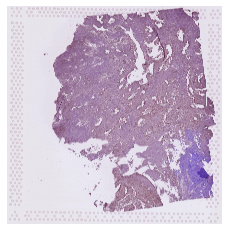

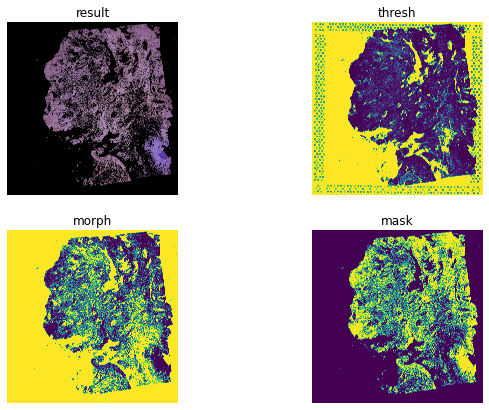

In [7]:
thresh, morph, mask, result = remove_background(img, lower, upper, image_name, output_path, output_end_name)

## 1.2. PDAC_A1_normalized

In [65]:
# Read image
img = cv2.imread(f'{input_path}/PDAC_12747476B_A1_normalized.jpg')
image_name = "PDAC_A1"
output_end_name = "_normalized_wo_background"

hh = 17242; ww = 17043; shape = (17242, 17043, 3)


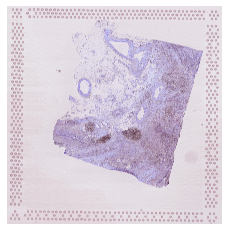

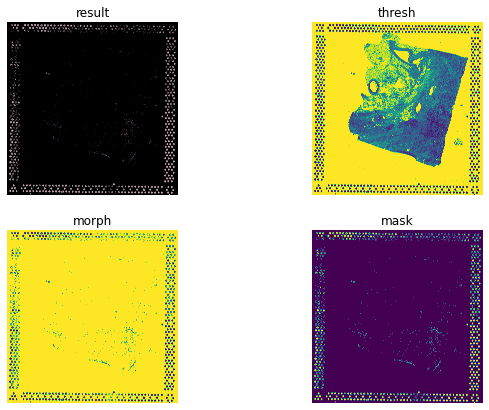

In [66]:
thresh_PDAC_A1, morph_PDAC_A1, mask_PDAC_A1, result_PDAC_A1 = remove_background(img, lower, upper, image_name, output_path, output_end_name)

### Test with kernel = (5,5)

hh = 17242; ww = 17043; shape = (17242, 17043, 3)


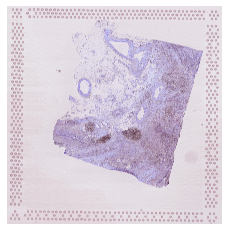

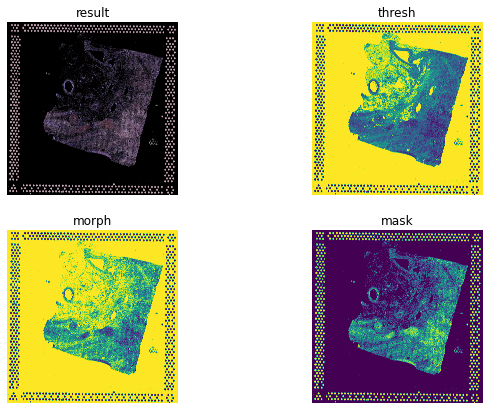

In [71]:
thresh_PDAC_A1, morph_PDAC_A1, mask_PDAC_A1, result_PDAC_A1 = remove_background(img, lower, upper, image_name, output_path, output_end_name)

### Test with kernel = (50,50)

hh = 17242; ww = 17043; shape = (17242, 17043, 3)


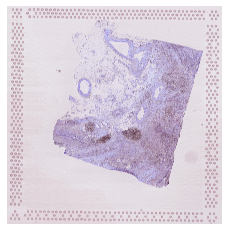

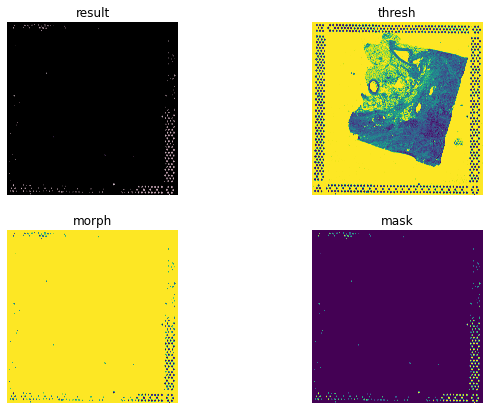

In [74]:
thresh_PDAC_A1, morph_PDAC_A1, mask_PDAC_A1, result_PDAC_A1 = remove_background(img, lower, upper, image_name, output_path, output_end_name)

### Test with kernel = (5,5) + exclude borders

hh = 17242; ww = 17043; shape = (17242, 17043, 3)


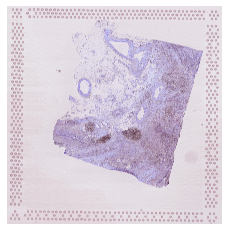

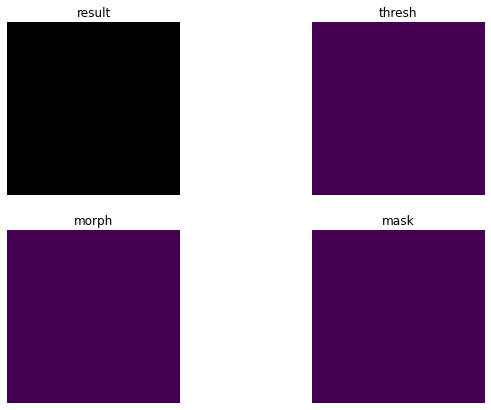

In [78]:
thresh_PDAC_A1, morph_PDAC_A1, mask_PDAC_A1, result_PDAC_A1 = remove_background(img, lower, upper, image_name, output_path, output_end_name)

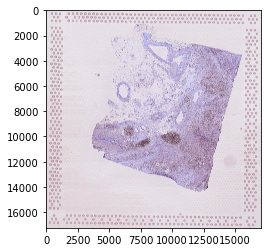

In [7]:
img = cv2.imread('normalized_hne_images/PDAC_12747476B_A1_normalized.jpg')
# Convertir en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Seuiller l'image pour extraire les contours
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# Trouver les contours de l'image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer un masque pour remplacer les contours par une couleur de fond uniforme
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Remplacer les contours par une couleur de fond uniforme
result = cv2.bitwise_and(img, mask)

plt.imshow(result)

## 1.3. PanCN_C3_normalized

In [61]:
# Read image
img = cv2.imread(f'{input_path}/PanCN_AVD_79MZ_0594_C3_normalized.jpg')
image_name = "PanCN_C3"
output_end_name = "_normalized_wo_background"

hh = 17215; ww = 17068; shape = (17215, 17068, 3)


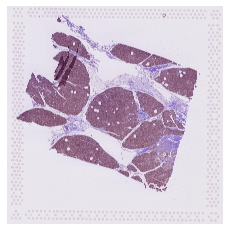

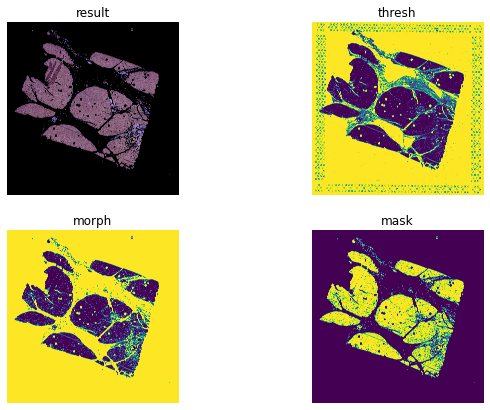

In [62]:
thresh_PanCN_C3, morph_PanCN_C3, mask_PanCN_C3, result_PanCN_C3 = remove_background(img, lower, upper, image_name, output_path, output_end_name)

## 1.4. PanCN_D4_normalized

In [63]:
# Read image
img = cv2.imread(f'{input_path}/PanCN_AVD_61VQ_0158_normalized.jpg')
image_name = "PanCN_D4"
output_end_name = "_normalized_wo_background"

hh = 17137; ww = 16768; shape = (17137, 16768, 3)


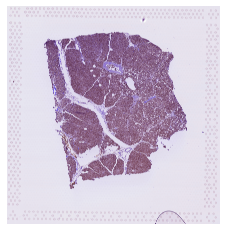

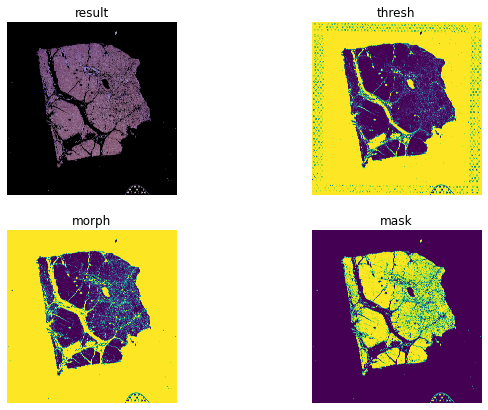

In [64]:
thresh_PanCN_D4, morph_PanCN_D4, mask_PanCN_D4, result_PanCN_D4 = remove_background(img, lower, upper, image_name, output_path, output_end_name)

# 2. Raw images

In [5]:
output_path = "./wo_background_raw_hne"

In [6]:
# Read image
img = cv2.imread('input_images/PDAC_ILS50185PT2_B2.jpg')
hh, ww = img.shape[:2]

hh = 17107; ww = 16907; shape = (17107, 16907, 3)


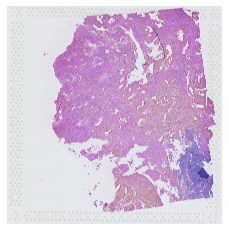

In [7]:
print(f"hh = {hh}; ww = {ww}; shape = {img.shape}")
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

In [9]:
# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

In [10]:
# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [11]:
# invert morp image
mask = 255 - morph

In [22]:
# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

In [23]:
# save results
cv2.imwrite(f'{output_path}/PDAC_B2/PDAC_B2_raw_thresh.jpg', thresh)
cv2.imwrite(f'{output_path}/PDAC_B2/PDAC_B2_raw_morph.jpg', morph)
cv2.imwrite(f'{output_path}/PDAC_B2/PDAC_B2_raw_mask.jpg', mask)
cv2.imwrite(f'{output_path}/PDAC_B2/PDAC_B2_raw_wo_background.jpg', result)

#cv2.imshow('thresh', thresh)
#cv2.imshow('morph', morph)
#cv2.imshow('mask', mask)
#cv2.imshow('result', result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

True

In [21]:
PDAC_B2_result = cv2.imread(f'{output_path}/PDAC_B2/PDAC_B2_raw_result.jpg')
PDAC_B2_thresh = cv2.imread(f'{output_path}/PDAC_B2/PDAC_B2_raw_thresh.jpg')
PDAC_B2_morph = cv2.imread(f'{output_path}/PDAC_B2/PDAC_B2_raw_morph.jpg')
PDAC_B2_mask = cv2.imread(f'{output_path}/PDAC_B2/PDAC_B2_raw_mask.jpg')

Text(0.5, 1.0, 'PDAC_B2_mask')

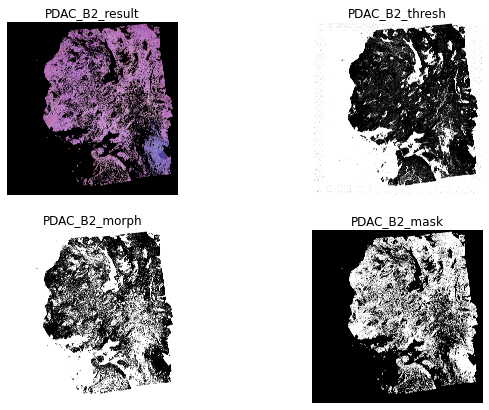

In [17]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(PDAC_B2_result)
plt.axis('off')
plt.title("PDAC_B2_result")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(PDAC_B2_thresh)
plt.axis('off')
plt.title("PDAC_B2_thresh")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(PDAC_B2_morph)
plt.axis('off')
plt.title("PDAC_B2_morph")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(PDAC_B2_mask)
plt.axis('off')
plt.title("PDAC_B2_mask")

Text(0.5, 1.0, 'PDAC_B2_normalized')

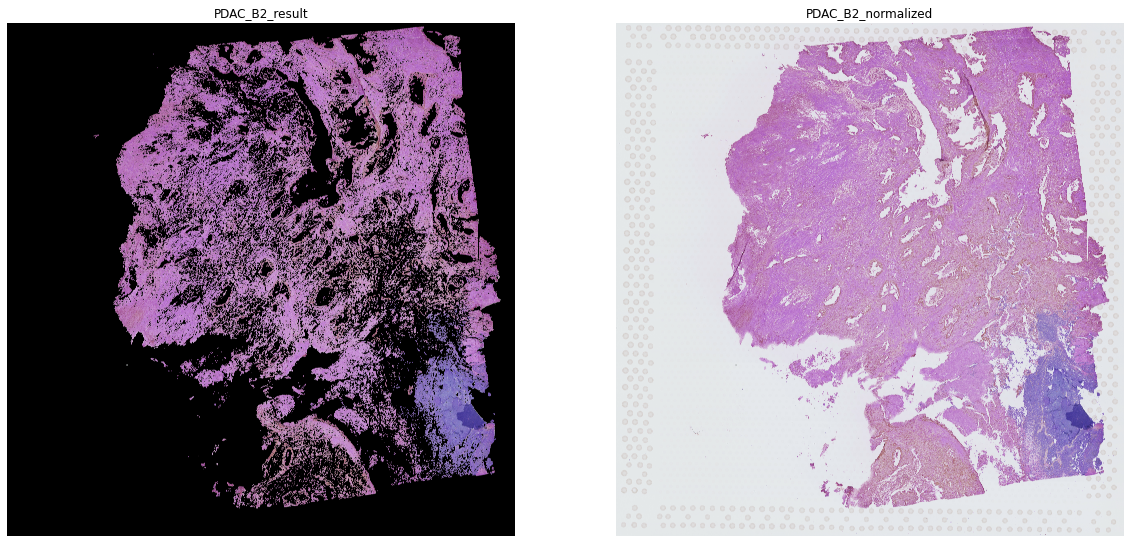

In [18]:
# create figure
fig = plt.figure(figsize=(20, 14))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(PDAC_B2_result)
plt.axis('off')
plt.title("PDAC_B2_result")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("PDAC_B2_normalized")